# Geochemical Variations in Igneous Rocks - Mining
Dataset: https://www.kaggle.com/datasets/cristianminas/geochemical-variations-in-igneous-rocks-mining

Context
Knowing the type of rock, knowing the properties and characteristics is very important in the mining and energy industry, so this Dataset details the geochemical variations and compositions (SiO2, TiO2, Al2O3, Fe2O3, …..)of different types of rock.
The objective of this data set is focused on finding interesting characteristics and being able to find the type of rock given a series of properties.

Content
This Dataset contains a csv file where different properties are detailed, it also contains Excel files where other similar Datasets from other parts of the world are added, which can be used to increase the size of the Dataset.
The files have null values and need to be formatted to be included

Objectives

it is expected to be able to create a model that can identify the type of rock according to its properties
be able to find interesting correlations

4162条数据

火成岩地球化学变化:
- 探讨不同类型火成岩(如花岗岩、玄武岩等)在化学成分、矿物组成、texture等方面的差异和变化规律。这些特征反映了火成岩形成的地质环境和地质过程。
- 在采矿领域的应用:
    - 火成岩地球化学数据可用于矿产资源的勘探和开发。
    - 不同类型火成岩往往富集有价值的矿产元素,如金属矿产。
    - 了解火成岩地球化学特征有助于预测和定位矿产资源的分布。
  
这些信息可为矿业勘探和开发提供重要依据。

In [1]:
# 导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### 数据准备

In [2]:
# 创建数据框
data = pd.read_csv('./data/RockData.csv')

# 打印前3行，预览数据
print(data.head(3))

# 获取 rock_name 列的所有唯一值（查看有多少种类的岩石），一共98个类别，发现类名含有?，在预处理阶段进行处理
unique_rock_names = data['rock_name'].unique()
num_rock_types = len(data['rock_name'].unique())
print('\n', f"{num_rock_types} Unique rock names in the dataset:", '\n')
print(unique_rock_names)

  rock_name      long      lat  SiO2n  TiO2n  Al2O3n  FeO*n  MnOn   MgOn  \
0    Basalt -122.5850  46.2300  47.77   1.33   15.38   9.59  0.17  10.76   
1    Basalt -122.5806  46.2436  47.94   1.28   15.22   9.60  0.18  10.87   
2    Basalt -122.5925  46.2036  51.50   1.12   16.04   8.77  0.15   9.49   

    CaOn  Na2On  K2On P2O5n  
0  11.28   2.69  0.62  0.41  
1  11.39   2.17  0.96  0.38  
2   9.80   2.64  0.33  0.16  

 98 Unique rock names in the dataset: 

['Basalt' 'Basaltic andesite' 'Andesite' 'Diorite' 'Dacite' 'Microdiorite'
 'Basaltic andesite dike' 'Quartz diorite' 'Granodiorite'
 'Quartz monzodiorite' 'Tonalite' 'Granite?' 'Granite' 'Aplite'
 'Basalt scoria' 'Diorite dike' 'Andesite dike' 'Andesite intrusion'
 'Andesite sill?' 'Dacite sill?' 'Dacite dike' 'Rhyolite' 'Andesite dike?'
 'Dacite breccia' 'Basalt dike' 'Andesite breccia' 'Gabbro/diorite'
 'Gabbro' nan 'Rhyolite tuff' 'Dacite tuff' 'Andesite sill' 'Diorite sill'
 'Basaltic andesite breccia' 'Andesite plug' 'Micr

### 数据预处理

#### 数据缺失

In [3]:
# 检查缺失值
print("Missing values:")
print(data.isnull().sum())

# 删除含有缺失值的数据
data = data.dropna()

# 再次检查缺失值
print("\nMissing values after dropping rows with missing rock_name:")
print(data.isnull().sum())

Missing values:
rock_name     40
long          44
lat           44
SiO2n         27
TiO2n         27
Al2O3n        27
FeO*n         27
MnOn         182
MgOn          27
CaOn          27
Na2On         28
K2On          27
P2O5n        242
dtype: int64

Missing values after dropping rows with missing rock_name:
rock_name    0
long         0
lat          0
SiO2n        0
TiO2n        0
Al2O3n       0
FeO*n        0
MnOn         0
MgOn         0
CaOn         0
Na2On        0
K2On         0
P2O5n        0
dtype: int64


#### 丢弃不确定和样本过少的类别

In [4]:
# 删除 rock_name 列包含 '?' 的行
data = data[~data['rock_name'].str.contains('\?')]

# 统计剩余的岩石类型数量
num_rock_types = len(data['rock_name'].unique())
print(f"After removing rows with '?' in rock_name, there are {num_rock_types} unique rock types remaining.")

# 丢弃样本类别小于 20 的类，因为样本太少，统计意义不大
rock_counts = data['rock_name'].value_counts()
data = data[data['rock_name'].isin(rock_counts[rock_counts >= 20].index)]

# 更新统计剩余的岩石类型数量
num_rock_types = len(data['rock_name'].unique())
print(f"After removing rock types with less than 10 samples, there are {num_rock_types} unique rock types remaining.")

After removing rows with '?' in rock_name, there are 88 unique rock types remaining.
After removing rock types with less than 10 samples, there are 16 unique rock types remaining.


#### 数据类型检查

In [5]:
# 获取第一条数据
first_row = data.iloc[1]

# 查看第一个样本每一列的数据类型
print("Data types of the specified columns in the first row:")
for col in ['SiO2n', 'TiO2n', 'Al2O3n', 'FeO*n', 'MnOn', 'MgOn', 'CaOn', 'Na2On', 'K2On', 'P2O5n']:
    print(f"{col}: {type(first_row[col])}")

# 检查所有样本的每一个属性的数据类型是否是 float
for col in ['long', 'lat', 'SiO2n', 'TiO2n', 'Al2O3n', 'FeO*n', 'MnOn', 'MgOn', 'CaOn', 'Na2On', 'K2On', 'P2O5n']:
    # 检查该列是否全部为float类型
    if not data[col].apply(lambda x: isinstance(x, float)).all():
        # 如果有非float类型,打印出该列的数据名
        print(f"Non-float values found in column '{col}'")

# 发现P2O5n有str，遍历P2O5n这一列的所有元素，尝试把str转换为'numpy.float64'，如果转换失败，打印这一行数据，继续转换剩余数据
for i, value in enumerate(data['P2O5n']):
    try:
        value= np.float64(value)
    except ValueError:
        print(f"Error converting value '{value}' at row {i} in column 'P2O5n':")
        print(data.iloc[i])
        continue

# 处理 P2O5n 列中的特殊值
data['P2O5n'] = data['P2O5n'].apply(lambda x: 0.05 if isinstance(x, str) and x.startswith('<') else float(x))

Data types of the specified columns in the first row:
SiO2n: <class 'numpy.float64'>
TiO2n: <class 'numpy.float64'>
Al2O3n: <class 'numpy.float64'>
FeO*n: <class 'numpy.float64'>
MnOn: <class 'numpy.float64'>
MgOn: <class 'numpy.float64'>
CaOn: <class 'numpy.float64'>
Na2On: <class 'numpy.float64'>
K2On: <class 'numpy.float64'>
P2O5n: <class 'str'>
Non-float values found in column 'P2O5n'
Error converting value '<0.05' at row 3135 in column 'P2O5n':
rock_name    Rhyolite
long        -122.8011
lat           43.5532
SiO2n           83.73
TiO2n            0.17
Al2O3n          10.28
FeO*n            0.69
MnOn             0.02
MgOn             0.25
CaOn             1.53
Na2On            2.24
K2On             1.08
P2O5n           <0.05
Name: 3637, dtype: object


#### 数据标准化和划分

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 标准化到0-1的区间
scaler = StandardScaler()

# 选择要标准化的列
cols_to_scale = ['SiO2n', 'TiO2n', 'Al2O3n', 'FeO*n', 'MnOn', 'MgOn', 'CaOn', 'Na2On', 'K2On', 'P2O5n']
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# 准备特征和目标变量
X = data[cols_to_scale]
y = data['rock_name']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2860, 10)
Testing set shape: (715, 10)


### 数据分布可视化

#### 样本类别分布

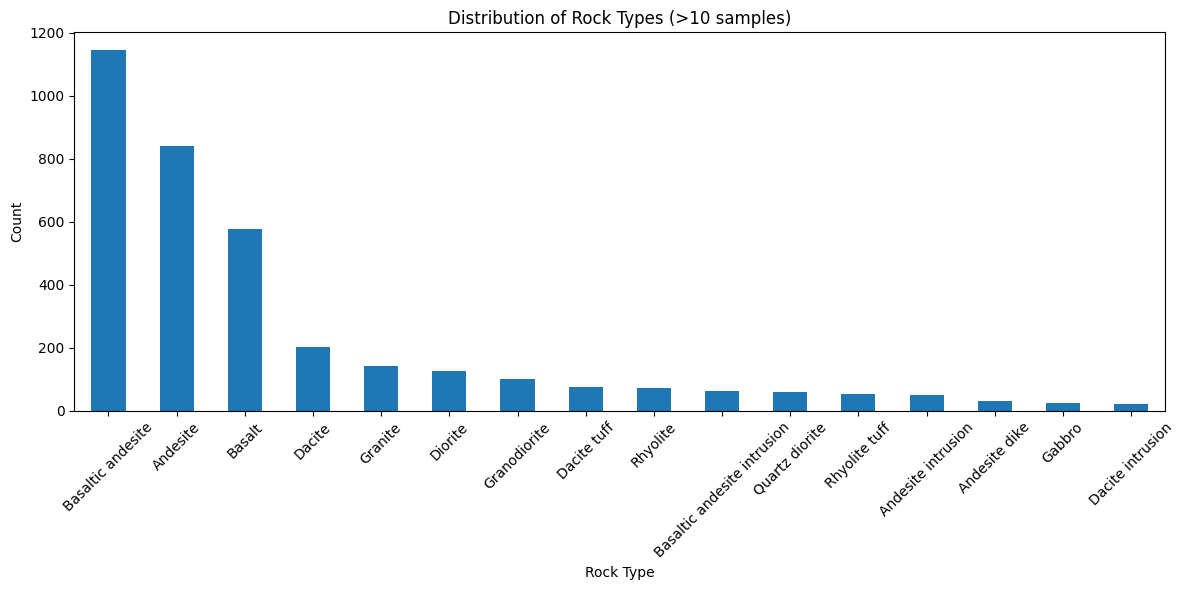

In [7]:
# 统计每个岩石类型的样本数量
rock_counts = data['rock_name'].value_counts()
# 只保留样本数量大于 10 的岩石类型, 只有26个类别
filtered_rock_counts = rock_counts[rock_counts > 10]

# 岩石类型分布直方图
plt.figure(figsize=(12, 6))
filtered_rock_counts.plot(kind='bar')
plt.title('Distribution of Rock Types (>10 samples)')
plt.xlabel('Rock Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./figs/ROck_types')
plt.show()

#### 样本地理空间分布
![研究区域(google map)](./figs/研究区域.png).

研究区域 (From Google Map)

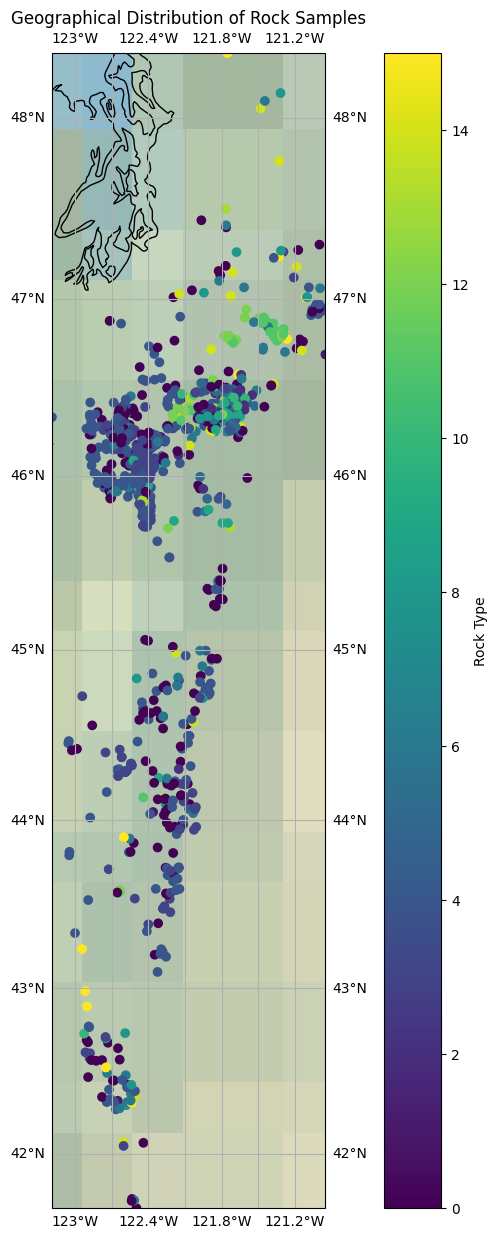

In [8]:
# 随机采样 1000 个样本进行PCA和地理空间分布可视化
sample_size = 1000
sample_data = data.sample(n=sample_size, random_state=42)

plt.figure(figsize=(15, 15))

# 创建 Cartopy 地图实例
ax = plt.axes(projection=ccrs.Mercator())
ax.stock_img()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)

# 绘制样本点
x, y = sample_data['long'], sample_data['lat']
scatter = ax.scatter(x, y, c=sample_data['rock_name'].astype('category').cat.codes, cmap='viridis', transform=ccrs.PlateCarree())

plt.title('Geographical Distribution of Rock Samples')
plt.colorbar(scatter, label='Rock Type')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 设置地图范围为最大的经度和纬度，添加经纬度刻度
ax.set_extent([min(sample_data['long']), max(sample_data['long']), min(sample_data['lat']), max(sample_data['lat'])])
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
plt.savefig(r'./figs/Grographical_Distribution.png')
plt.show()

#### 样本特征分布
对样本的特征进行可视化分析。由于岩石的属性有很多，无法在高维空间可视化，使用主成分分析法提取前两个主成分（降到二维）进行可视化

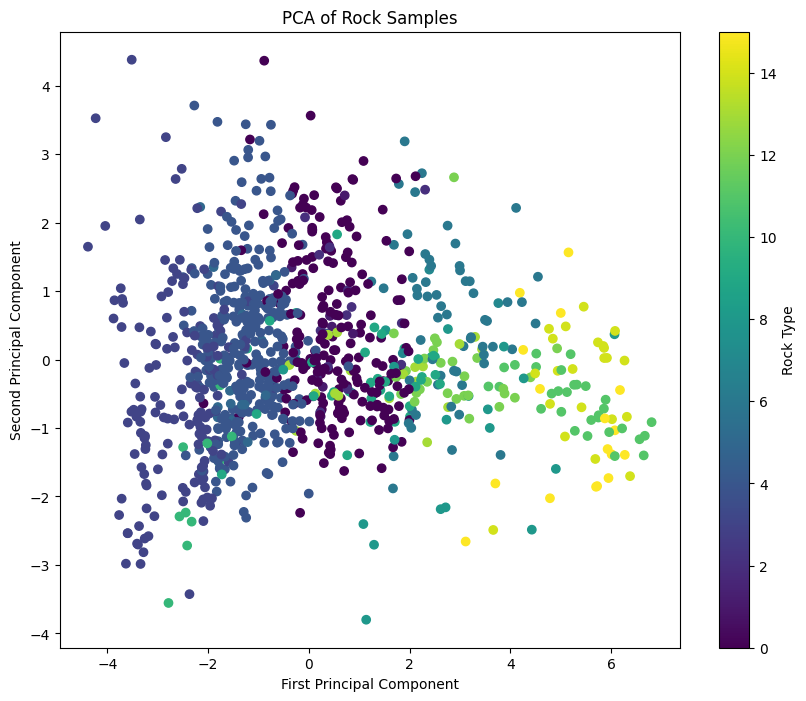

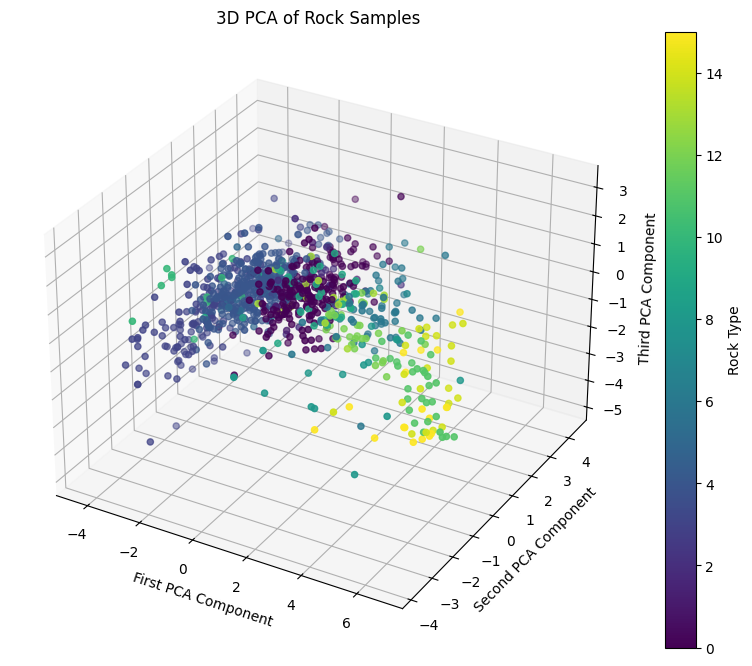

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


pca = PCA(n_components=2)
pca_result = pca.fit_transform(sample_data[cols_to_scale])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=sample_data['rock_name'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA of Rock Samples')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Rock Type')
plt.savefig(r'./figs/PCA_Visulization.png')
plt.show()


# 使用t-SNE将数据降到3维
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(sample_data[cols_to_scale])

# 可视化3D散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
                    c=sample_data['rock_name'].astype('category').cat.codes, cmap='viridis')

# 添加标题和坐标轴标签
ax.set_title('3D PCA of Rock Samples')
ax.set_xlabel('First PCA Component')
ax.set_ylabel('Second PCA Component')
ax.set_zlabel('Third PCA Component')

# 添加图例
plt.colorbar(scatter, label='Rock Type')

# 保存图像并显示
plt.savefig(r'./figs/PCA_Visulization_3D.png')

t-Distributed Stochastic Neighbor Embedding (t-SNE) (t-分布随机邻域嵌入) 是一种**非线性**降维算法,它通过最小化高维空间和低维空间中数据点之间的概率分布差异,将高维数据映射到低维空间,从而可以直观地展示数据的内在结构和聚类特征。

与传统的降维方法不同,t-SNE能够保留数据点之间的非线性关系,从而更好地反映数据的本质特征。

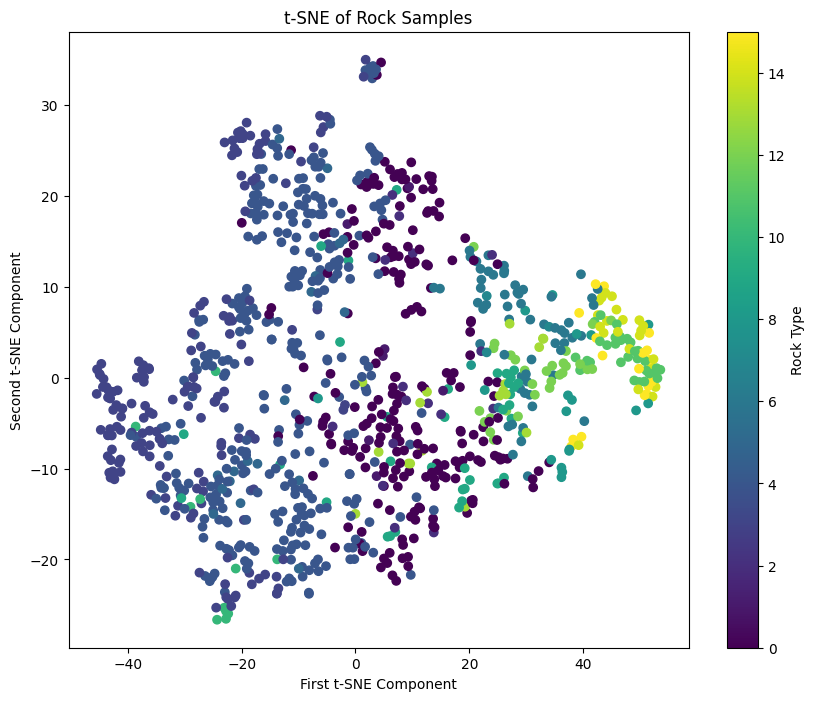

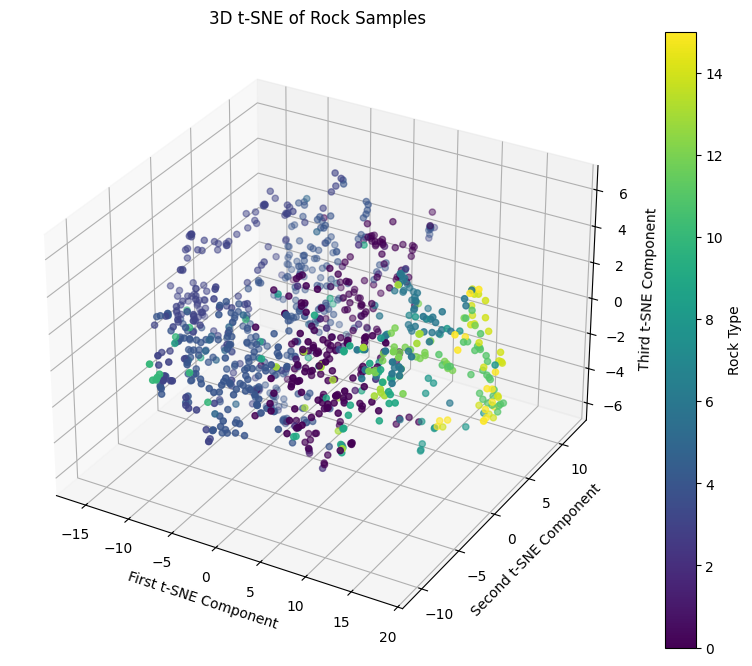

In [10]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(sample_data[cols_to_scale])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=sample_data['rock_name'].astype('category').cat.codes, cmap='viridis')
plt.title('t-SNE of Rock Samples')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.colorbar(scatter, label='Rock Type')
plt.savefig(r'./figs/TSNE_Visulization.png')
plt.show()


# 使用t-SNE将数据降到2维和3维
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_result_3d = tsne_3d.fit_transform(sample_data[cols_to_scale])

# 可视化3D散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_result_3d[:, 0], tsne_result_3d[:, 1], tsne_result_3d[:, 2],
                    c=sample_data['rock_name'].astype('category').cat.codes, cmap='viridis')

# 添加标题和坐标轴标签
ax.set_title('3D t-SNE of Rock Samples')
ax.set_xlabel('First t-SNE Component')
ax.set_ylabel('Second t-SNE Component')
ax.set_zlabel('Third t-SNE Component')

# 添加图例
plt.colorbar(scatter, label='Rock Type')

# 保存图像并显示
plt.savefig(r'./figs/TSNE_Visulization_3D.png')
plt.show()

### 机器学习模型训练

In [11]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# KNN 模型超参数搜索
knn = KNeighborsClassifier(n_neighbors=10)
knn_params = {'n_neighbors': [5, 10, 15]}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
print('KNN 最佳参数:', knn_grid.best_params_)

# SVM 模型超参数搜索
svm = SVC(kernel='rbf', C=1, gamma='auto')
svm_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
print('SVM 最佳参数:', svm_grid.best_params_)

# 随机森林模型超参数搜索
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, None]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
print('随机森林最佳参数:', rf_grid.best_params_)

KNN 最佳参数: {'n_neighbors': 10}
SVM 最佳参数: {'C': 10, 'gamma': 'auto'}
随机森林最佳参数: {'max_depth': 10, 'n_estimators': 100}


### 结果可视化分析
修改模型评估的代码，将混淆矩阵可视化，将分类报告导出到 csv 文件
- 计算测试集的平均准确率
- 可视化混淆矩阵
- 打印分类报告

KNN Model Evaluation:
Accuracy: 0.7132867132867133


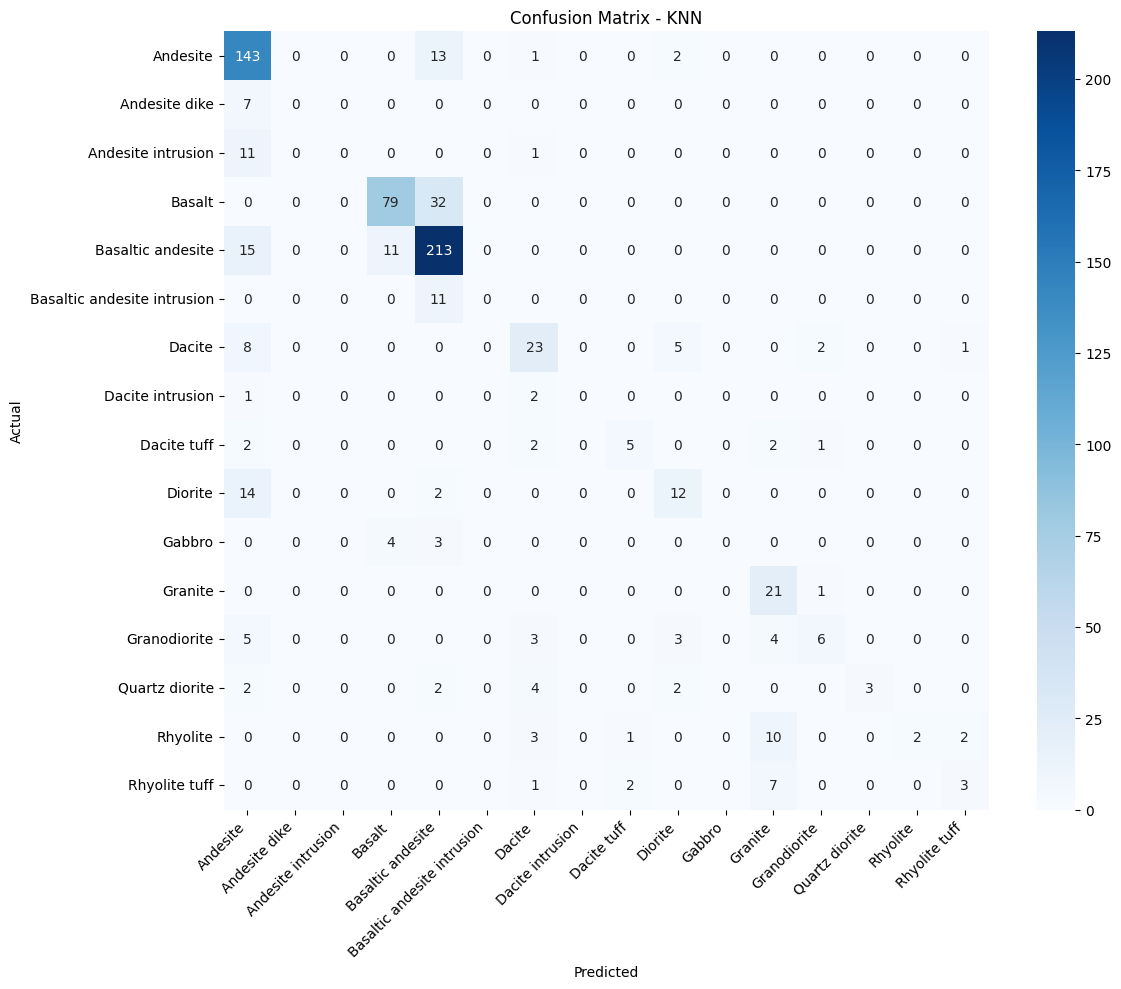

c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix saved as 'confusion_matrix_KNN.png'
Classification Report saved as 'classification_report_KNN.xlsx'
SVM Model Evaluation:
Accuracy: 0.7608391608391608


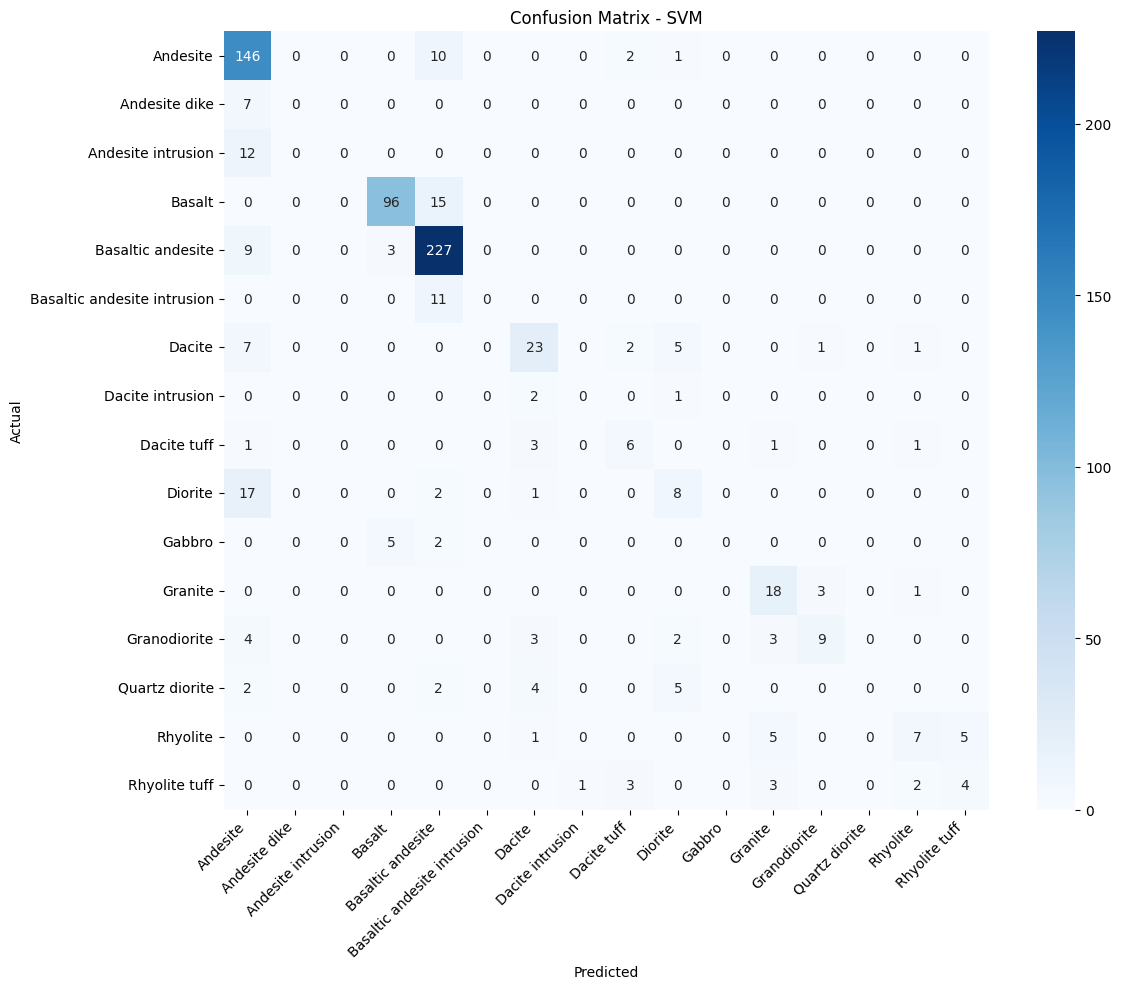

c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix saved as 'confusion_matrix_SVM.png'
Classification Report saved as 'classification_report_SVM.xlsx'

Random Forest Model Evaluation:
Accuracy: 0.7832167832167832


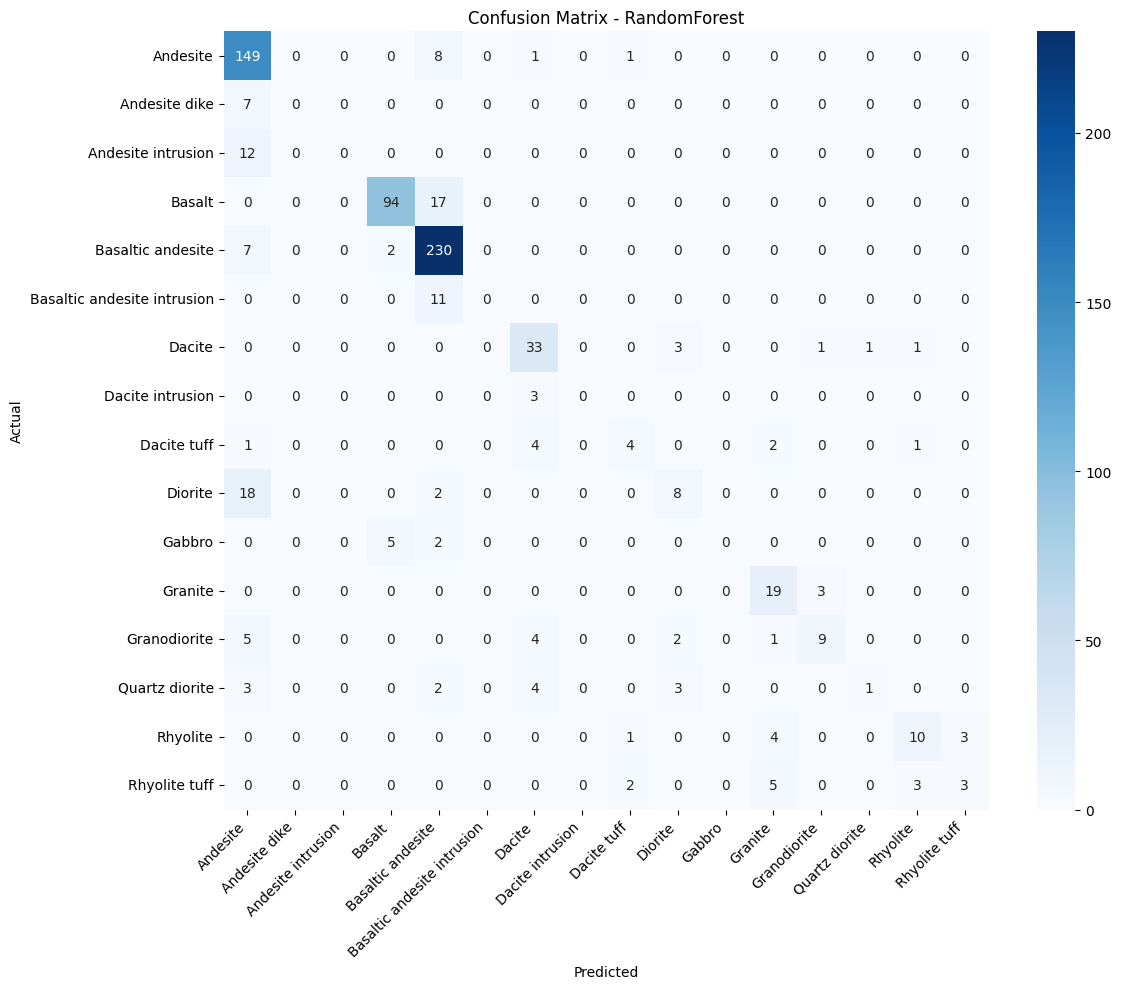


Confusion Matrix saved as 'confusion_matrix_RandomForest.png'
Classification Report saved as 'classification_report_RandomForest.xlsx'


c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zyj19\.conda\envs\sam\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # 准确率
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    
    # 混淆矩阵可视化
    cm = confusion_matrix(y_test, y_pred)
    rock_types = np.unique(y_test)  # 获取唯一的岩石类型名称
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=rock_types, yticklabels=rock_types)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'./figs/confusion_matrix_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 分类报告
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report.to_excel(f'classification_report_{model_name}.xlsx')
    
    print(f"\nConfusion Matrix saved as 'confusion_matrix_{model_name}.png'")
    print(f"Classification Report saved as 'classification_report_{model_name}.xlsx'")

# 评估KNN模型
print("KNN Model Evaluation:")
evaluate_model(knn_grid, X_test, y_test, 'KNN')

print("SVM Model Evaluation:")
evaluate_model(svm_grid, X_test, y_test, 'SVM')

# 评估随机森林模型
print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_grid, X_test, y_test, 'RandomForest')